# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 01a. Import customer_ords_prods_merged

In [2]:
ords_prods=pd.read_pickle(r"C:\Users\eniad\Downloads\Instacart Basket Analysis\02 Data\prepared data\customers_ords_prods_merged.pkl")

In [3]:
ords_prods.head()

,order_id,user_id,eval_set,order_number,orders_day_of week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First Name,Surname,Gender,State,Age,date_joined,number_dependants,family status,income
0,2539329,1,prior,1,2,8,6.0,196,1,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,6.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,6.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,6.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,6.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
ords_prods.shape

(32406041, 35)

# 02 If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<Axes: >

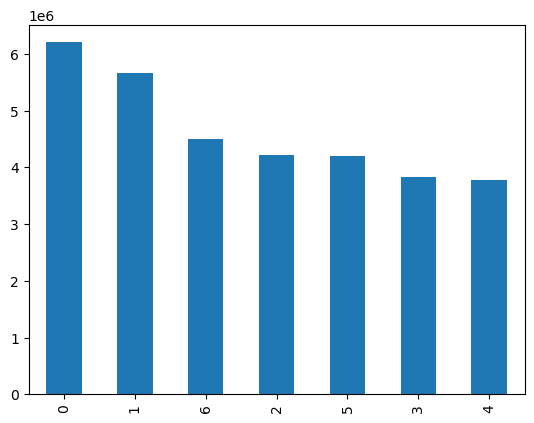

In [5]:
# Create a bar chart
ords_prods['orders_day_of week'].value_counts().plot.bar()

<Axes: >

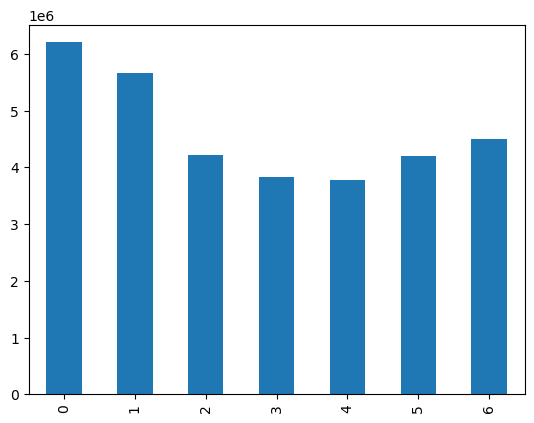

In [6]:
# Creating bar according from smaller to largest
ords_prods['orders_day_of week'].value_counts().sort_index().plot.bar()

In [7]:
ords_prods['orders_day_of week'].value_counts()

0    6204404
1    5660456
6    4496635
2    4213986
5    4205906
3    3840701
4    3783953
Name: orders_day_of week, dtype: int64

In [8]:
# Reordering column from smaller to largest
ords_prods['orders_day_of week'].value_counts().sort_index()

0    6204404
1    5660456
2    4213986
3    3840701
4    3783953
5    4205906
6    4496635
Name: orders_day_of week, dtype: int64

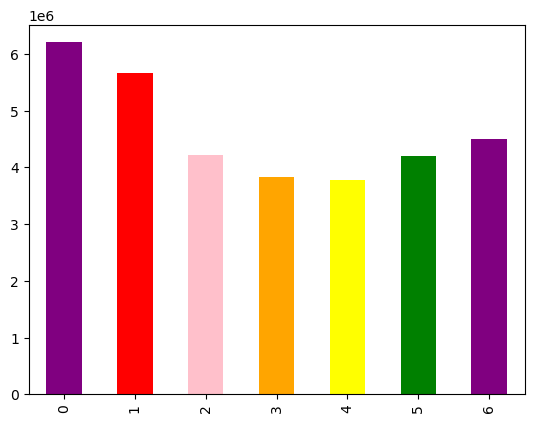

In [9]:
bar=ords_prods['orders_day_of week'].value_counts().sort_index().plot.bar(color=['purple','red','pink','orange','yellow','green'])

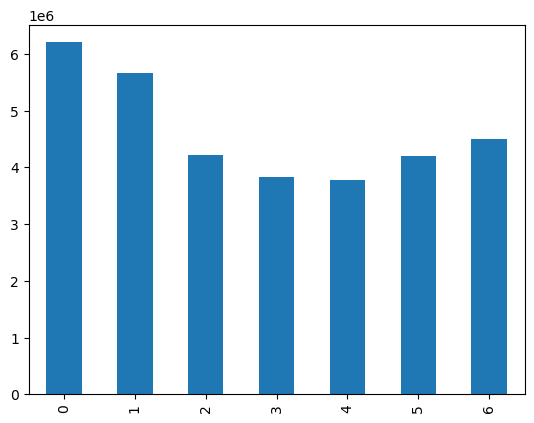

In [10]:
# Exporting bar charts
bar=ords_prods['orders_day_of week'].value_counts().sort_index().plot.bar()

In [11]:
# Exporting bar charts to Analysis folder
bar.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\bar_customers_dow_.png')

<Axes: ylabel='Frequency'>

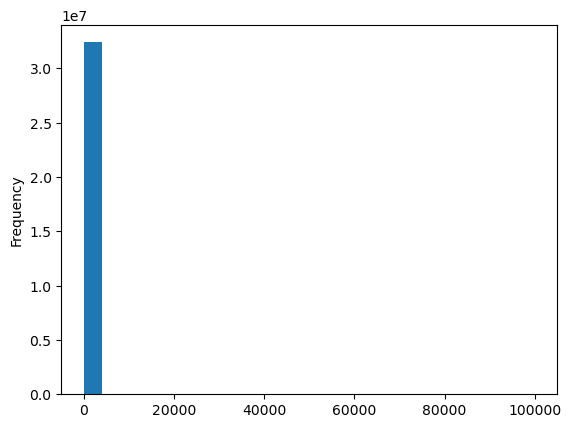

In [12]:
# Creating Histogram
ords_prods['prices'].plot.hist(bins = 25)

In [13]:
# Descriptive statistics
ords_prods['prices'].describe()

count    3.240604e+07
mean     1.198004e+01
std      4.956464e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
# Investigate further
ords_prods['prices'].mean()

11.980040357290182

In [15]:
# Investigate further
ords_prods['prices'].median()

7.4

In [16]:
# Investigate further
ords_prods['prices'].max()

99999.0

There is 12 and 7 for mean and median while the maximum is outrageous due to data corruption. The maximum value makes histogram shove all small values into one bar and extreme value into another.

<Axes: xlabel='prices', ylabel='prices'>

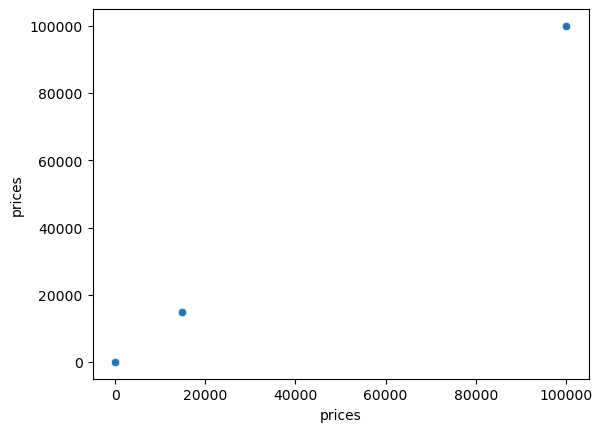

In [17]:
# Creating scatter plots
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods)

In [18]:
ords_prods.loc[ords_prods['prices'] >100]

,order_id,user_id,eval_set,order_number,orders_day_of week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First Name,Surname,Gender,State,Age,date_joined,number_dependants,family status,income
7805,1435153,1519,prior,26,2,11,23.0,21553,15,0,...,NaN,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,prior,32,3,10,23.0,21553,28,1,...,NaN,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,prior,33,1,19,24.0,21553,1,0,...,NaN,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,prior,27,2,19,11.0,33664,2,0,...,Regular customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,prior,1,2,9,10.0,21553,3,0,...,Frequent customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32304980,3265389,51346,prior,4,1,17,3.0,33664,2,1,...,Frequent customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32309063,1179092,131671,prior,12,4,9,7.0,33664,1,0,...,Frequent customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32311991,1226705,39667,prior,7,2,15,5.0,33664,14,0,...,Frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32331229,3000037,95105,prior,2,4,19,3.0,33664,4,0,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [60]:
pd.options.display.max_rows=None

In [63]:
pd.options.display.max_columns=None

In [64]:
ords_prods.head()

,order_id,user_id,eval_set,order_number,orders_day_of week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,aferage_price,average_price,median_prior_order,order_frequency_flag,First Name,Surname,Gender,State,Age,date_joined,number_dependants,family status,income
0,2539329,1,prior,1,2,8,6.0,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,6.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Lowest days,Average orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,6.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Lowest days,Most orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,6.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Lowest days,Average orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,6.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Lowest days,Most orders,10,New customer,Low spender,5.813559,6.367797,6.0,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [19]:
ords_prods.loc[ords_prods['prices'] >100, 'prices'] = np.nan

In [20]:
ords_prods['prices'].max()

25.0

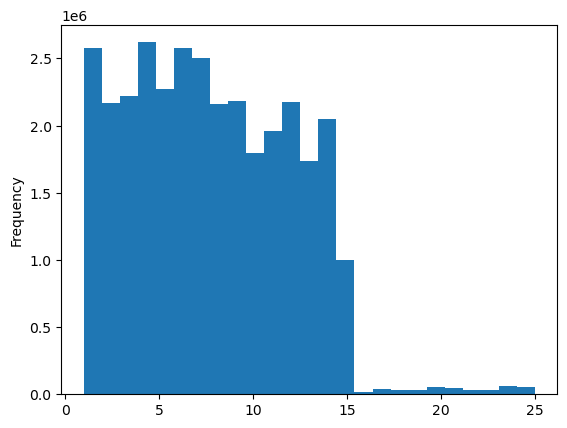

In [21]:
hist=ords_prods['prices'].plot.hist(bins=25)

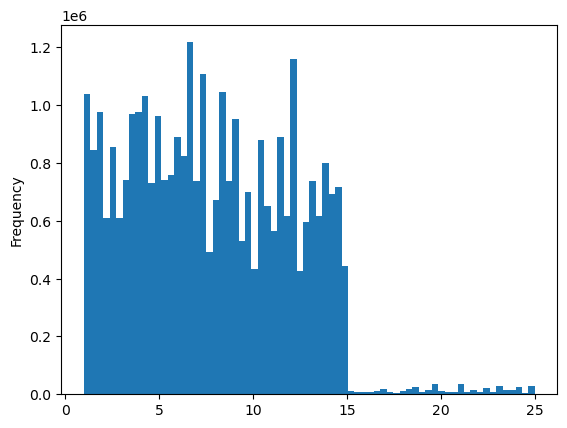

In [22]:
hist_2=ords_prods['prices'].plot.hist(bins=70)

In [23]:
# Exporting histogram
hist.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\hist_customers_dow_updated.png')

In [24]:
# Creating line charts
np.random.seed(4)

In [25]:
dev = np.random.rand(len(ords_prods)) <= 0.7

In [26]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [27]:
np.random.rand(10)

array([0.14652875, 0.19185561, 0.99657905, 0.59139971, 0.45592832,
       0.56184089, 0.40007843, 0.31079573, 0.35588093, 0.63298758])

In [28]:
big = ords_prods[dev]

In [29]:
small = ords_prods[~dev]

In [30]:
# Create a list holding True/False value to the test np.random.rand()<=0.7
dev=np.random.rand(len(ords_prods))<=0.7

In [31]:
# store 70% of the sample in dataframe big 
big = ords_prods[dev]

In [32]:
# store 30% of the sample in dataframe big 
small = ords_prods[~dev]

In [33]:
len(ords_prods)

32406041

In [34]:
len(big) + len(small)

32406041

In [35]:
# Creating dataframe containing prices and orders day of week from small subset
df_2 = small[['orders_day_of week','prices']]


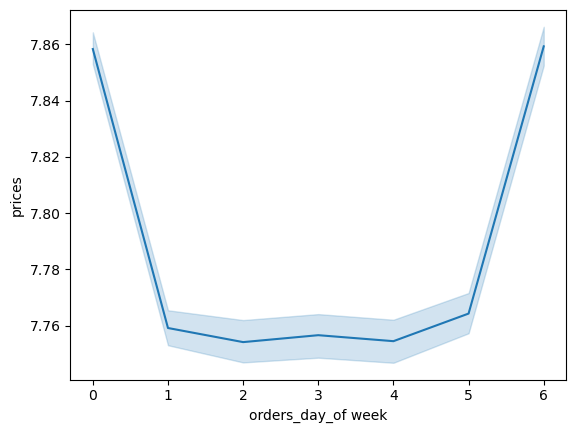

In [36]:
# Create line chart for a small subset of the dataframe
line = sns.lineplot(data = df_2, x = 'orders_day_of week',y = 'prices')

In [37]:
# Creating line chart for the entire dataframe
df_4 = ords_prods[['orders_day_of week','prices']]

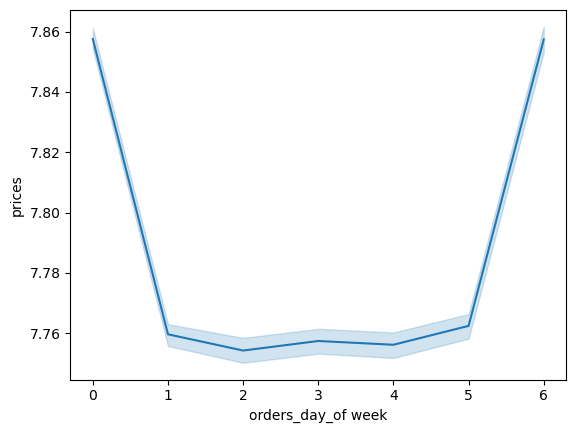

In [38]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of week',y = 'prices')

In [39]:
# Exporting line chart
line_2.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\df_line_chart.png')

# 03. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.


<Axes: ylabel='Frequency'>

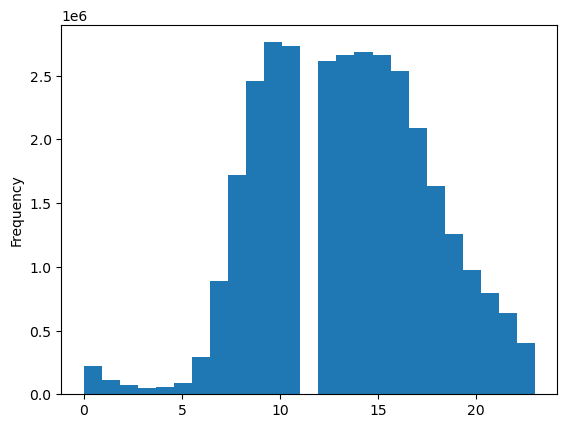

In [40]:
# Creating Histogram
ords_prods['order_hour_of_day'].plot.hist(bins = 25)

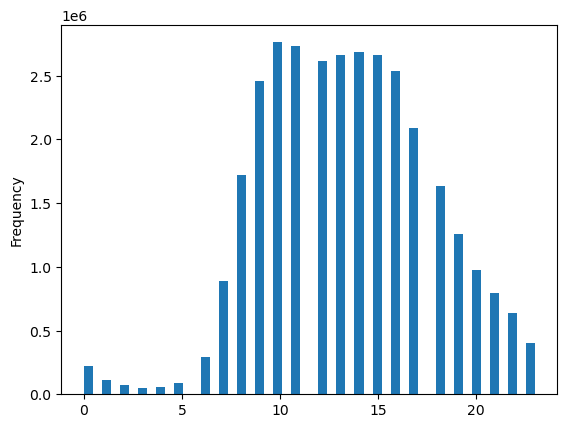

In [41]:
hist=ords_prods['order_hour_of_day'].plot.hist(bins = 50)

In [42]:
# Exporting  to Analysis folder
hist.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\hist_order_day.png')

In [43]:
# Descriptive statistics
ords_prods['order_hour_of_day'].describe()

count    3.240604e+07
mean     1.342515e+01
std      4.246382e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [44]:
# Investigate further
ords_prods['order_hour_of_day'].mean()

13.425148446859028

In [45]:
ords_prods['order_hour_of_day'].median()

13.0

In [46]:
ords_prods['order_hour_of_day'].max()

23

The mean and median is 13 and maximum ordering time is 23

# 04. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<Axes: >

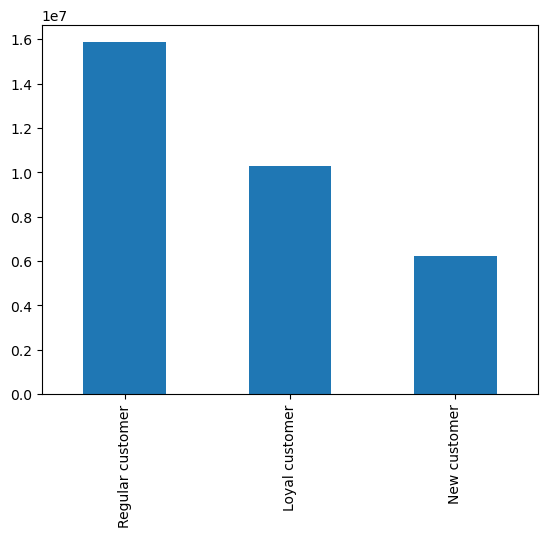

In [47]:
# Create a bar chart for loyalty_flag
ords_prods['loyalty_flag'].value_counts().plot.bar()

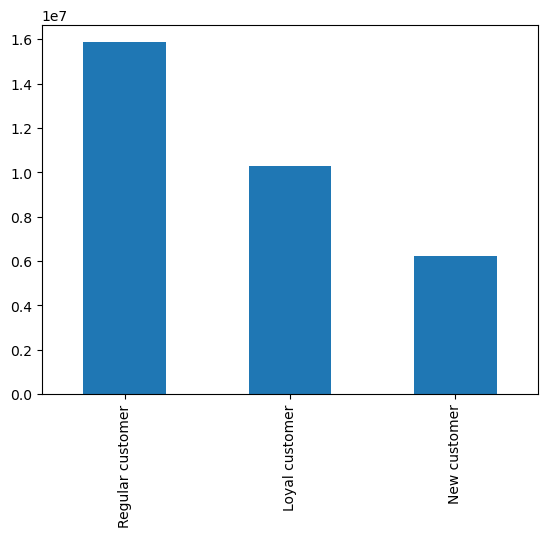

In [48]:
# Exporting bar charts
bar=ords_prods['loyalty_flag'].value_counts().plot.bar()

In [49]:
# Exporting bar charts to Analysis folder
bar.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\loyalty_flag_.png')

# 05. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [50]:
# Creating dataframe containing prices and orders day of week from small subset
df_2 = ords_prods[['order_hour_of_day','prices']]

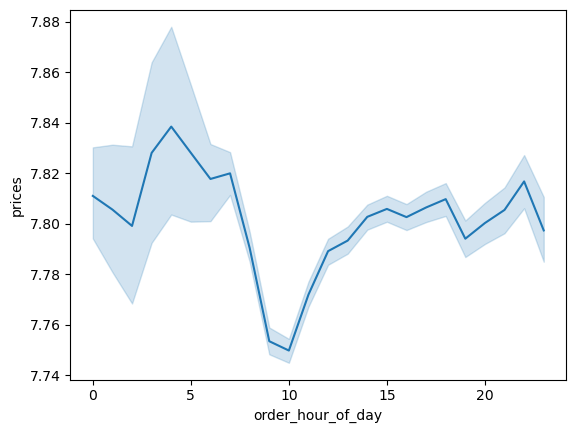

In [51]:
# Create line chart for a small subset of the dataframe
line_2 = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

From the above, the prices are lower from the 10-hour upward while higher prices occur at the hour 5 and 10hour.

In [52]:
# Exporting line charts to Analysis folder
line_2.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\line_hour_prices.png')

# 06. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [53]:
# Creating dataframe containing Age and number of dependants from small subset
df_3 = ords_prods[['Age','number_dependants']]

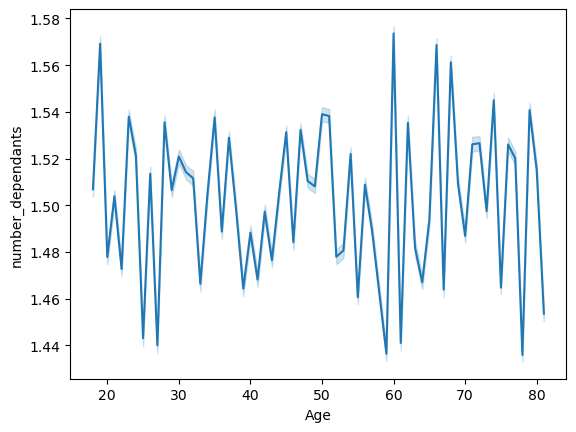

In [54]:
# Create line chart for a small subset of the dataframe
line_3 = sns.lineplot(data = df_3, x = 'Age',y = 'number_dependants')

In [55]:
# Exporting line charts to Analysis folder
line_3.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\line_Age_dependants.png')

# 07. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

<Axes: xlabel='income', ylabel='Age'>

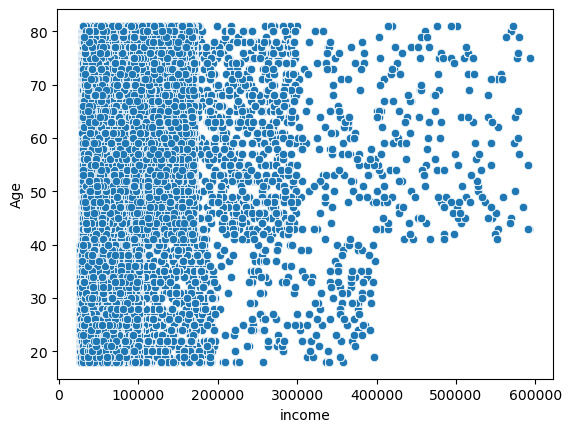

In [56]:
# Creating scatter plots to show relationship between Age and income
sns.scatterplot(x = 'income', y = 'Age',data = small)

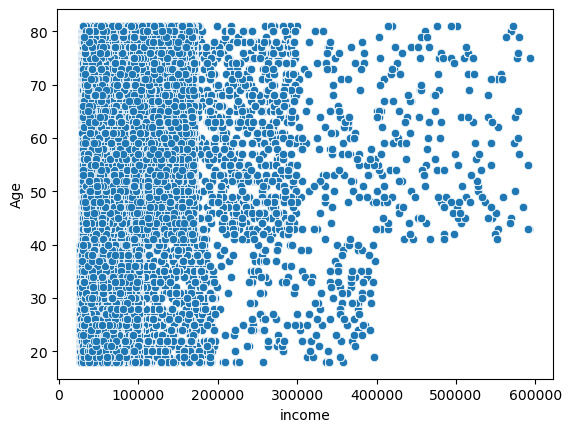

In [57]:
sns=sns.scatterplot(x = 'income', y = 'Age',data = small)

There is no clear relationship between Age and income

In [58]:
# Exporting Scatter charts to Analysis folder
sns.figure.savefig(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\scatter_Plot.png')

# Exporting notebook 

In [59]:
ords_prods.to_pickle(r'C:\Users\eniad\Downloads\Instacart Basket Analysis\02 Data\prepared data\customer_ords_prods_merged_1.pkl')